In [248]:
# Scavenger Hunt that includes code that takes directly from sqlite 
import sqlite3 as lite
import os
import sys
import numpy as np
import pandas as pd
from pyne import nucname
import collections
import matplotlib.pyplot as plt
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()
from IPython.display import Image

In [249]:
import analysis_astrid as an

In [250]:
!rm cyclus.sqlite
!cyclus astrid.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

In [251]:
# get sqlite cursor and simulation time parameters
filename = 'cyclus.sqlite'
#conn = lite.connect(filename)
#cur = conn.cursor()
cur = an.get_cursor(filename)
init_year, init_month, duration, timestep = an.get_timesteps(cur)

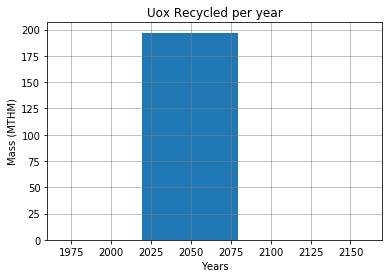

In [252]:
# Spent Uox Recycled per year 
uox_amount = cur.execute('SELECT time, quantity FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%uox_U%"').fetchall()
#entertimes = cur.execute('SELECT time FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%uox_U%"').fetchall()

#print(uox_amount[0])

list = []
for time in timestep:
    uox =0
    for row in uox_amount:
        if time ==row['time']:
            uox = row['quantity']*1E-3
    list.append(uox)
    
#print(list)
    
time = timestep/12 + init_year    

#print(list)
        
#uox_amount = pd.read_sql_query('SELECT quantity FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%uox_U%"',conn)
#entertimes = pd.read_sql_query('SELECT time FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%uox_U%"',conn)
#uox_amount = np.transpose(uox_amount)
#print(uox_amount)
#print(entertimes)

#plt.bar(entertimes,uox_amount, align='center', alpha=0.5)
#plt.plot(entertimes,uox_amount,'ro')
#plt.show()

#print(time)

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Uox Recycled per year')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()




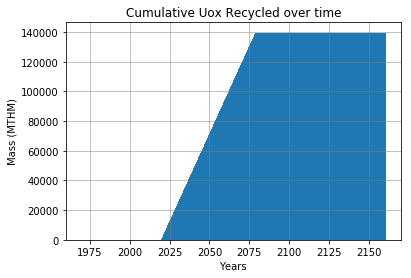

In [253]:
# Spent Uox recycled cumulative 
uox_amount = cur.execute('SELECT time, quantity FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%uox_U%"').fetchall()

list = []
uox = 0
for time in timestep:
    for row in uox_amount:
        if time ==row['time']:
            uox = uox + row['quantity']*1E-3
    list.append(uox)
        
time = timestep/12 + init_year    

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Cumulative Uox Recycled over time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()



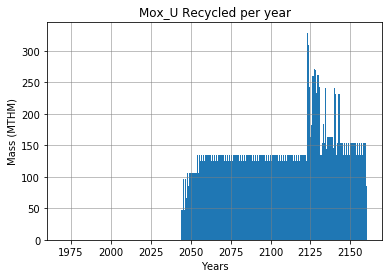

In [254]:
# Recycled Mox U per year 
moxU_amount = cur.execute('SELECT time, quantity FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%mox_U%"').fetchall()

print(moxU_amount[0])

list = []
for time in timestep:
    moxU =0
    for row in moxU_amount:
        if time ==row['time']:
            moxU = row['quantity']*1E-3
    list.append(moxU)
    
#print(list)
#print(timestep)
    
time = timestep/12 + init_year  

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Mox_U Recycled per year')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

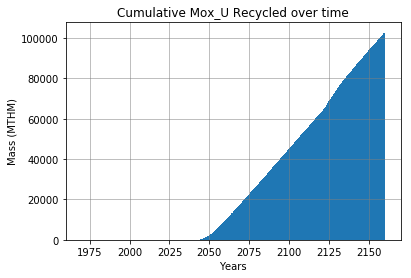

In [255]:
# Recycled Mox U cumulative 
moxU_amount = cur.execute('SELECT time, quantity FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%mox_U%"').fetchall()

list = []
moxU =0
for time in timestep:
    for row in moxU_amount:
        if time ==row['time']:
            moxU = moxU +row['quantity']*1E-3
    list.append(moxU)
    
#print(list)
#print(timestep)
    
time = timestep/12 + init_year  

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Cumulative Mox_U Recycled over time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

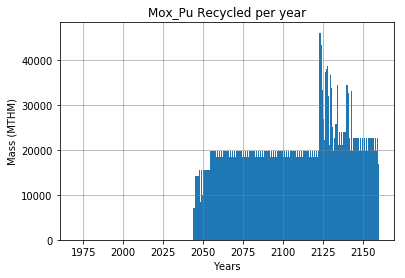

In [256]:
# Recycled Mox Pu per year
moxPu_amount = cur.execute('SELECT time, quantity FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%mox_Pu%"').fetchall()


list = []
for time in timestep:
    moxPu =0
    for row in moxPu_amount:
        if time ==row['time']:
            moxPu = row['quantity']
    list.append(moxPu)
    
#print(list)
#print(timestep)
    
time = timestep/12 + init_year  

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Mox_Pu Recycled per year')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

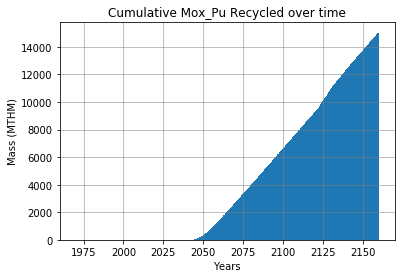

In [257]:
# Recycled Mox Pu cumulative 
moxPu_amount = cur.execute('SELECT time, quantity FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%mox_Pu%"').fetchall()


list = []
moxPu =0
for time in timestep:
    for row in moxPu_amount:
        if time ==row['time']:
            moxPu = moxPu + row['quantity']*1E-3
    list.append(moxPu)
    
#print(list)
#print(timestep)
    
time = timestep/12 + init_year  

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Cumulative Mox_Pu Recycled over time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

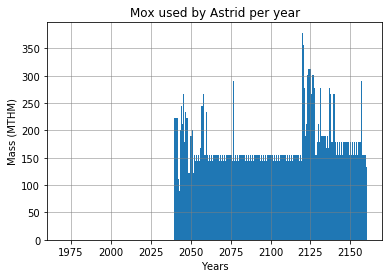

In [259]:
# Mox used in astrid per year
mox_amount = cur.execute('SELECT time, sum(quantity) FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity = "mox" group by time').fetchall()

list = []
for time in timestep:
    mox =0
    for row in mox_amount:
        if time ==row['time']:
            mox =+ row['sum(quantity)']*1E-3
    list.append(mox)
    
time = timestep/12 + init_year  

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Mox used by Astrid per year')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

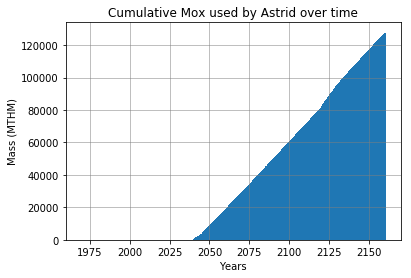

In [260]:
# Mox used in astrid cumulative 
mox_amount = cur.execute('SELECT time, sum(quantity) FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity = "mox" group by time').fetchall()

list = []
mox =0
for time in timestep:
    for row in mox_amount:
        if time ==row['time']:
            mox = mox + row['sum(quantity)']*1E-3
    list.append(mox)
    
time = timestep/12 + init_year  

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Cumulative Mox used by Astrid over time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

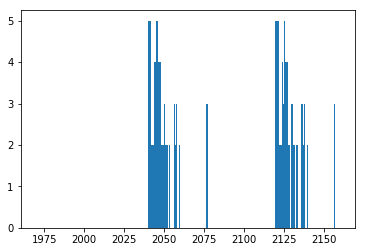

In [261]:
# Reactor Deployment per year
reactors_and_entertimes = cur.execute('SELECT entertime, Prototype FROM agententry '
                                      'WHERE Prototype = "astrid"').fetchall()

list = []

for time in timestep:
    count = 0
    for row in reactors_and_entertimes:
        if time == row[0]:
            if count == 0:
                count = +1
            else :
                count = count +1
            
    list.append(count)

# print(timestep)
time = timestep/12 + init_year  
plt.bar(time, list)
plt.show()

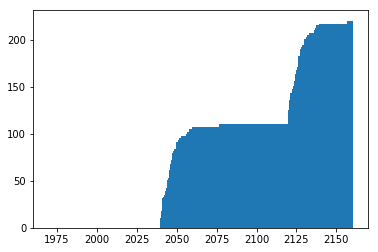

In [265]:
# Reactor Deployment cumulative 
reactors_and_entertimes = cur.execute('SELECT entertime, Prototype FROM agententry '
                                      'WHERE Prototype = "astrid"').fetchall()

list = []
count = 0
for time in timestep:
    
    for row in reactors_and_entertimes:
        if time == row[0]:
            count = count +1
    list.append(count)

# print(timestep)
time = timestep/12 + init_year  
plt.bar(time, list)
plt.show()

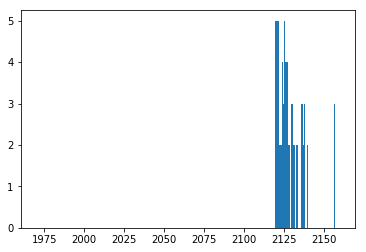

In [263]:
# Reactor decommission per year 
reactors_and_exittimes = cur.execute('SELECT exittime FROM agentexit INNER JOIN agententry ON agentexit.agentId = agententry.agentId WHERE prototype = "astrid"').fetchall()

list = []

for time in timestep:
    count = 0
    for row in reactors_and_exittimes:
        if time == row[0]:
            if count == 0:
                count = +1
            else :
                count = count +1
            
    list.append(count)

# print(timestep)
time = timestep/12 + init_year  
plt.bar(time, list)
plt.show()

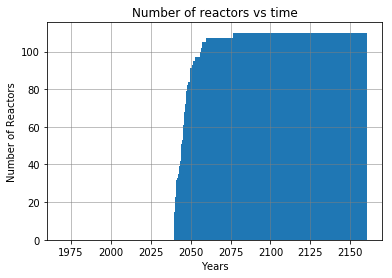

In [276]:
# Reactor Deployment and Decommission cumulative 
reactors_and_entertimes = cur.execute('SELECT entertime, Prototype FROM agententry '
                                      'WHERE Prototype = "astrid"').fetchall()
reactors_and_exittimes = cur.execute('SELECT exittime FROM agentexit INNER JOIN agententry ON agentexit.agentId = agententry.agentId WHERE prototype = "astrid"').fetchall()

list = []
count = 0
for time in timestep:
    for row in reactors_and_entertimes:
        if time == row['entertime'] :
            count = count +1
    for rows in reactors_and_exittimes:
        if time == rows['exittime'] :
            count = count -1
    list.append(count)

# print(timestep)
time = timestep/12 + init_year  
plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Number of Reactors')
plt.title('Number of reactors vs time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

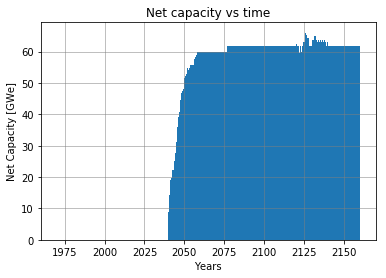

In [281]:
# Total Power generated per year 
power_generated = cur.execute('SELECT time, sum(value) FROM agententry INNER JOIN timeseriespower ON timeseriespower.AgentId = agententry.AgentId group by time').fetchall()

list = []

for time in timestep:
    power =0
    for row in power_generated:
        if time ==row['time']:
            power = row['sum(value)']*1E-3
    list.append(power)
    
time = timestep/12 + init_year  

plt.bar(time, list)
plt.xlabel('Years')
plt.ylabel('Net Capacity [GWe]')
plt.title('Net capacity vs time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()